In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import os, sys,pickle
import time 
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns

In [24]:
low_customer_tariffs = {'date': ['01/07/2012', '01/09/2015', '01/01/2017', '13/08/2018', '20/01/2020'],
                        'price (rwf)': [134, 182, 89, 89, 89]}
low_tarrif_df = pd.DataFrame(data=low_customer_tariffs)
low_tarrif_df['date'] = pd.to_datetime(low_tarrif_df['date'])
low_tarrif_df

,date,price (rwf)
0,2012-01-07,134
1,2015-01-09,182
2,2017-01-01,89
3,2018-08-13,89
4,2020-01-20,89


In [18]:
df_half_year = pd.read_pickle('/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/batched_data/combined_half_year_consumption.pck')
df_half_year.head() 

,meter_serial_number_consumer_id,mean_consumption_2_12,mean_consumption_1_13,mean_consumption_2_13,mean_consumption_1_14,mean_consumption_2_14,mean_consumption_1_15,mean_consumption_2_15,mean_consumption_1_16,mean_consumption_2_16,mean_consumption_1_17,mean_consumption_2_17,mean_consumption_1_18,mean_consumption_2_18,mean_consumption_1_19,mean_consumption_2_19
0,4206320410_151157,14.000000,15.100000,15.315476,12.276190,12.055769,13.664423,10.450,13.526190,13.423810,10.935714,12.730952,6.240000,6.934524,8.018571,10.140000
1,4206320428_154564,15.800000,34.250000,68.711111,60.472222,63.900000,54.512500,62.125,71.000000,59.166667,45.780000,42.549167,46.545833,31.848333,20.810000,16.083333
2,4206320436_119743,23.783333,33.716667,31.970833,22.165278,23.168056,24.296875,22.400,20.608333,20.050000,15.816667,12.183333,6.333333,23.416667,53.650000,84.416667
3,5000398650_24288,87.847619,116.926190,79.347619,108.909524,128.261905,130.185714,121.435,119.893333,105.504762,88.195238,92.566667,76.383333,72.433333,59.600000,NaN
4,5000399450_26002,59.366667,56.100000,60.461905,63.838095,82.326667,91.820000,47.300,30.533333,34.257143,37.776190,53.957143,52.411429,106.083333,90.650000,100.314286


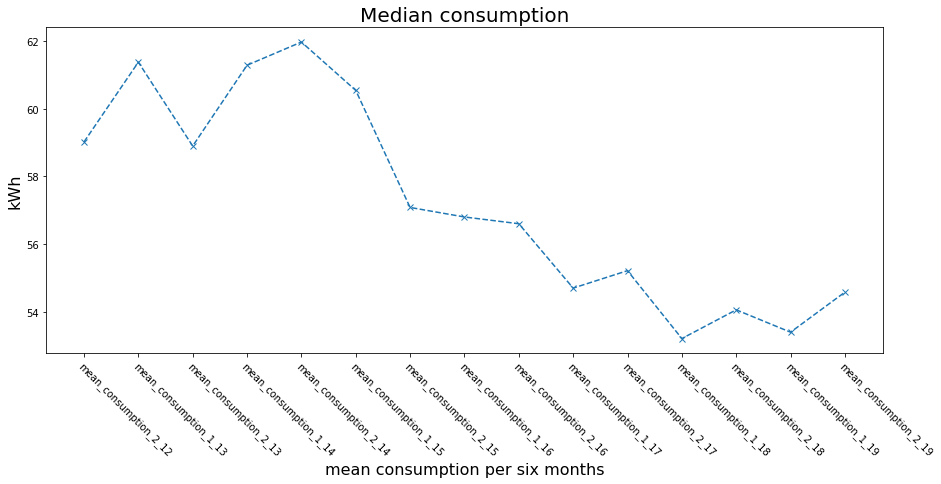

In [20]:
data = df_half_year[['mean_consumption_2_12','mean_consumption_1_13',
              'mean_consumption_2_13','mean_consumption_1_14',
              'mean_consumption_2_14','mean_consumption_1_15',
              'mean_consumption_2_15','mean_consumption_1_16',
              'mean_consumption_2_16','mean_consumption_1_17',
              'mean_consumption_2_17','mean_consumption_1_18',
              'mean_consumption_2_18','mean_consumption_1_19',
              'mean_consumption_2_19'
             ]].mean()
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(data, 'x', ls='--')
ax.set_xlabel('mean consumption per six months', fontsize=16)
ax.set_ylabel('kWh', fontsize=16)
ax.set_title('Median consumption', fontsize=20)
# rotates labels 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

In [42]:
# select low and high threshold levels
low_df = df_half_year[df_half_year['mean_consumption_2_12']<10]
high_df = df_half_year[df_half_year['mean_consumption_2_12']>50]

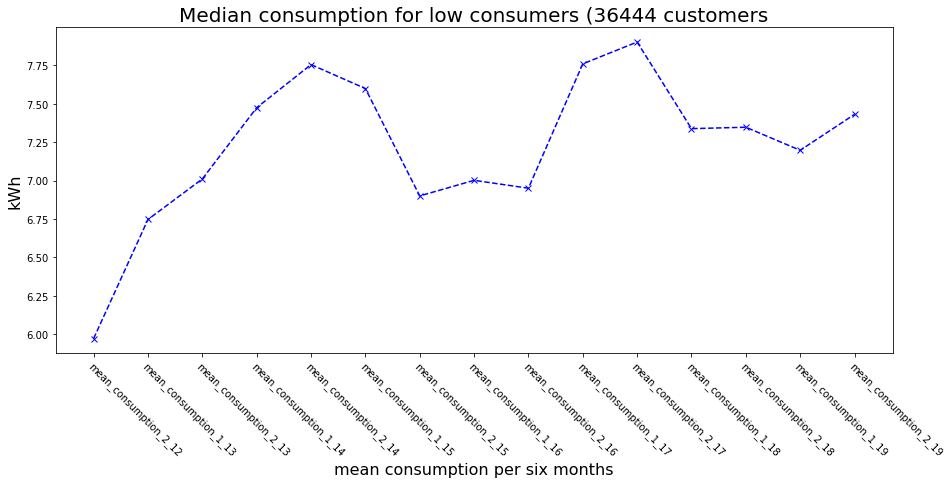

In [40]:
data = low_df[['mean_consumption_2_12','mean_consumption_1_13',
              'mean_consumption_2_13','mean_consumption_1_14',
              'mean_consumption_2_14','mean_consumption_1_15',
              'mean_consumption_2_15','mean_consumption_1_16',
              'mean_consumption_2_16','mean_consumption_1_17',
              'mean_consumption_2_17','mean_consumption_1_18',
              'mean_consumption_2_18','mean_consumption_1_19',
              'mean_consumption_2_19'
             ]].median()
fig, ax1 = plt.subplots(figsize=(15,6))
# bp = ax1.boxplot(df_half_year)
ax1.plot(data, 'bx', ls='--')
ax1.set_xlabel('mean consumption per six months', fontsize=16)
ax1.set_ylabel('kWh', fontsize=16)
ax1.set_title(f'Median consumption for low consumers ({len(low_df)} customers', fontsize=20)
# rotates labels 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

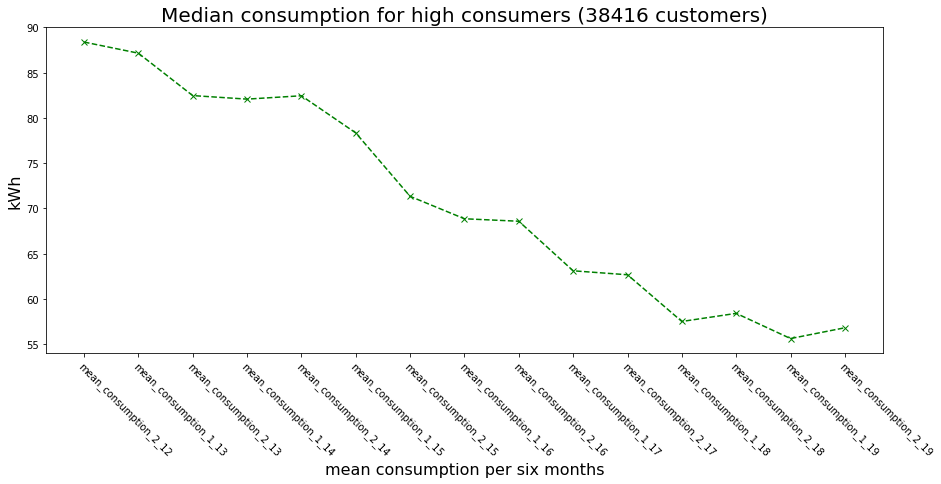

In [39]:
data = high_df[['mean_consumption_2_12','mean_consumption_1_13',
              'mean_consumption_2_13','mean_consumption_1_14',
              'mean_consumption_2_14','mean_consumption_1_15',
              'mean_consumption_2_15','mean_consumption_1_16',
              'mean_consumption_2_16','mean_consumption_1_17',
              'mean_consumption_2_17','mean_consumption_1_18',
              'mean_consumption_2_18','mean_consumption_1_19',
              'mean_consumption_2_19'
             ]].median()
fig, ax2 = plt.subplots(figsize=(15,6))
ax2.plot(data, 'gx', ls='--')
ax2.set_xlabel('mean consumption per six months', fontsize=16)
ax2.set_ylabel('kWh', fontsize=16)
ax2.set_title(f'Median consumption for high consumers ({len(high_df)} customers)', fontsize=20)
# rotates labels 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

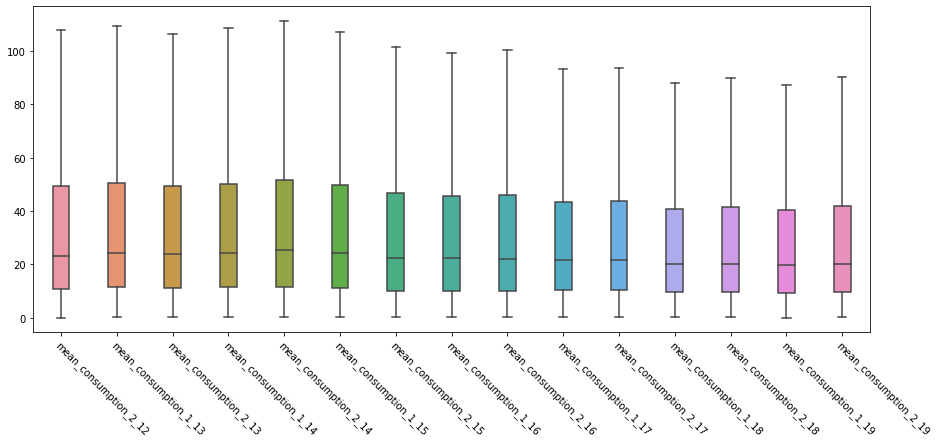

In [27]:
fig, ax3 = plt.subplots(figsize=(15,6))
sns.boxplot(data=df_half_year, showfliers=False, color=None, width=0.3)
plt.setp( ax3.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

In [2]:
df = pd.read_pickle('/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/batched_data/combined_half_year_consumption_from_2015.pck')

In [6]:
# Meta file
meta_df = pd.read_pickle(
    '/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/metadata_folder/REG_metadata_March_3_2021.pck')
meta_df['meter_serial_number_consumer_id'] = meta_df['meter_serial_number'].astype(str) +'_'+ meta_df['consumer_id']
meta_df['installation_year'] = meta_df.installation_date.dt.year

In [3]:
df.head()

,meter_serial_number_consumer_id,mean_consumption_1_15,mean_consumption_2_15,mean_consumption_1_16,mean_consumption_2_16,mean_consumption_1_17,mean_consumption_2_17,mean_consumption_1_18,mean_consumption_2_18,mean_consumption_1_19,mean_consumption_2_19
0,14103411642_20131118 103510.834 0002014 3311,11.112847,14.280556,15.750000,16.875000,17.275000,14.300000,16.116667,13.900000,20.183333,16.450000
1,14103411667_20131024 080117.809 0002035 7190,4.750000,9.650000,16.355556,14.741667,9.083333,7.425000,11.568750,6.239583,5.983333,3.233333
2,14103412053_20130809 081957.486 0002025 2935,3.885714,3.275000,16.100000,3.620000,6.060000,7.733333,4.700000,6.663333,5.727778,4.800000
3,14103415874_20131023 110309.849 0002027 0422,10.487500,26.700000,20.495238,21.751429,26.703333,28.633333,14.550000,46.166667,21.216667,35.666667
4,14103415973_20131204 131728.501 0002014 6905,1.977500,1.608333,2.352083,1.275952,3.177143,2.864120,3.343022,3.670050,3.126974,4.048611


In [4]:
len(df)

304365

In [6]:
df[df.isna().any(axis=1)]

,meter_serial_number_consumer_id,mean_consumption_1_15,mean_consumption_2_15,mean_consumption_1_16,mean_consumption_2_16,mean_consumption_1_17,mean_consumption_2_17,mean_consumption_1_18,mean_consumption_2_18,mean_consumption_1_19,mean_consumption_2_19
8,14103417409_20151207 095814.559 0002021 0192,NaN,4.259259,2.306790,2.740000,4.566667,3.292593,3.846173,3.410000,2.657407,3.259259
12,14103418936_20141125 145353.661 0002021 1809,2.614741,6.189474,2.300000,NaN,2.858824,4.471895,4.611111,3.075000,3.892632,3.789474
39,14103422573_20131009 193042.396 0002012 7838,12.964286,13.825000,12.027778,10.972222,4.066667,2.980000,NaN,2.200000,3.200000,4.480000
40,14103422607_20140429 083315.027 0002036 8440,NaN,6.305128,12.127991,12.294935,4.874510,7.764103,8.942760,5.568627,8.231373,6.050000
48,14103422920_20140326 152423.884 0002036 1820,10.845000,10.054231,8.020513,6.643519,4.909722,5.320000,3.800000,NaN,9.600000,4.266667
...,...,...,...,...,...,...,...,...,...,...,...
304290,7074440046_166865,2.979310,1.759848,2.876768,2.183333,1.767273,2.278788,2.449697,2.373737,2.278788,NaN
304294,7074440137_161050,7.771429,2.300000,NaN,7.016667,6.040000,8.183333,15.583333,15.488889,8.616667,NaN
304295,7074440228_168321,6.300000,8.355556,3.959259,1.150000,4.750000,NaN,NaN,9.500000,2.400000,NaN
304333,7074441176_175712,5.670000,7.545000,6.593333,7.633333,6.861111,8.172222,7.825000,11.316667,9.600000,NaN


In [26]:
meta_filter = meta_df[(meta_df.installation_year==2015)]# | (meta_df.installation_year==2016)]
len(meta_filter)

64113

In [27]:
target_df = df[df.meter_serial_number_consumer_id.isin(meta_filter.meter_serial_number_consumer_id)]
len(target_df)

36199

In [19]:
target_df

,meter_serial_number_consumer_id,mean_consumption_1_15,mean_consumption_2_15,mean_consumption_1_16,mean_consumption_2_16,mean_consumption_1_17,mean_consumption_2_17,mean_consumption_1_18,mean_consumption_2_18,mean_consumption_1_19,mean_consumption_2_19
6,14103417144_20150117 123443.393 0002021 1958,8.605203,6.314594,4.958001,3.037389,3.577305,4.528369,3.368794,3.392908,4.655674,4.060284
8,14103417409_20151207 095814.559 0002021 0192,NaN,4.259259,2.306790,2.740000,4.566667,3.292593,3.846173,3.410000,2.657407,3.259259
11,14103418886_20150729 132938.561 0002021 5415,4.364865,5.135135,1.399459,2.155289,2.894194,2.488519,2.619815,2.408108,1.589459,1.632432
13,14103418944_20150716 101633.131 0002021 6854,6.300000,8.679545,8.390909,4.277273,5.315152,6.135185,3.781481,6.790909,3.259091,5.266667
18,14103419355_20150303 083455.558 0002016 6598,1.524211,1.769737,1.240000,3.618627,7.271723,7.570760,6.005556,7.404762,3.928571,3.800000
...,...,...,...,...,...,...,...,...,...,...,...
302987,7074383469_20150803 141608.398 0002013 1388,NaN,18.266667,40.716667,87.000000,83.216667,83.766667,78.459259,76.120370,65.931481,70.866667
303221,7074387890_20150205 153928.786 0002011 5514,3.264646,3.113131,14.196320,9.416710,9.523333,4.765657,3.586667,2.377273,4.654545,3.410101
303222,7074387932_20150120 182936.792 0002012 4634,10.157143,13.302778,9.964815,9.316667,13.183333,19.680000,20.553333,13.300000,16.900000,11.266667
304194,7074437240_20150116 130600.722 0002023 0829,NaN,112.825000,39.830556,72.444444,47.141667,59.591667,43.497222,64.233333,78.216667,73.055556


In [21]:
df['mean_consumption_1_15'].describe()

count    280844.000000
mean         45.843792
std         247.506043
min           0.000000
25%           7.183780
50%          16.833060
75%          37.629514
max       35174.129167
Name: mean_consumption_1_15, dtype: float64

In [28]:
# select low and high threshold levels
low_df = target_df[target_df['mean_consumption_1_15']<8]
high_df = target_df[target_df['mean_consumption_1_15']>38]

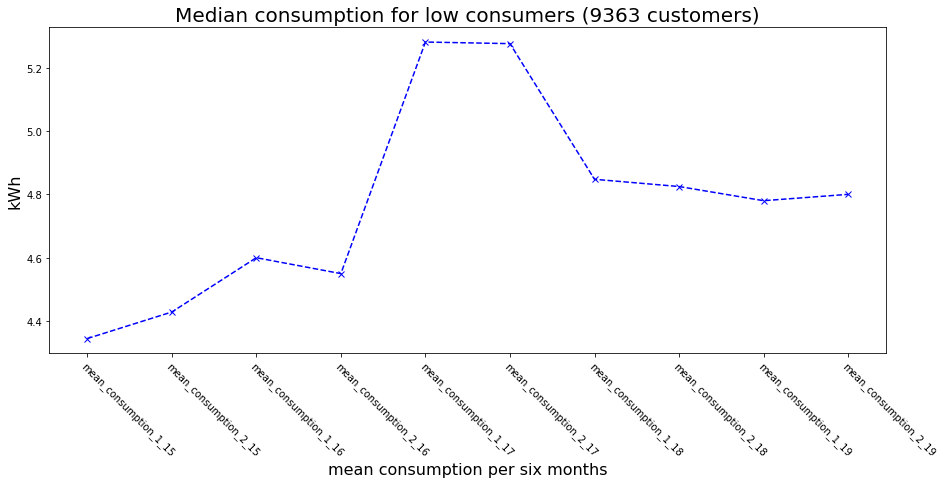

In [31]:
data = low_df[['mean_consumption_1_15',
              'mean_consumption_2_15','mean_consumption_1_16',
              'mean_consumption_2_16','mean_consumption_1_17',
              'mean_consumption_2_17','mean_consumption_1_18',
              'mean_consumption_2_18','mean_consumption_1_19',
              'mean_consumption_2_19'
             ]].median()
fig, ax1 = plt.subplots(figsize=(15,6))
# bp = ax1.boxplot(df_half_year)
ax1.plot(data, 'bx', ls='--')
ax1.set_xlabel('mean consumption per six months', fontsize=16)
ax1.set_ylabel('kWh', fontsize=16)
ax1.set_title(f'Median consumption for low consumers ({len(low_df)} customers)', fontsize=20)
# rotates labels 
plt.setp( ax1.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

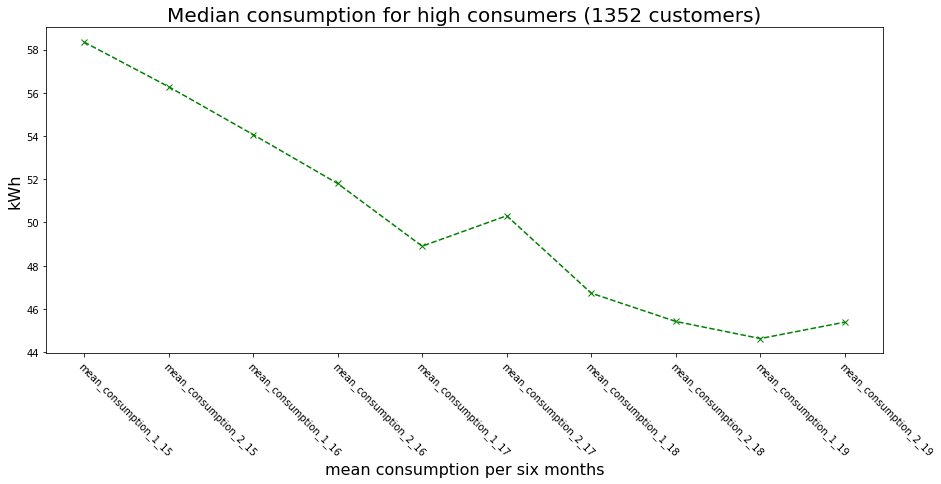

In [32]:
data = high_df[['mean_consumption_1_15',
              'mean_consumption_2_15','mean_consumption_1_16',
              'mean_consumption_2_16','mean_consumption_1_17',
              'mean_consumption_2_17','mean_consumption_1_18',
              'mean_consumption_2_18','mean_consumption_1_19',
              'mean_consumption_2_19'
             ]].median()
fig, ax2 = plt.subplots(figsize=(15,6))
ax2.plot(data, 'gx', ls='--')
ax2.set_xlabel('mean consumption per six months', fontsize=16)
ax2.set_ylabel('kWh', fontsize=16)
ax2.set_title(f'Median consumption for high consumers ({len(high_df)} customers)', fontsize=20)
# rotates labels 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=-45 , ha="left" , rotation_mode="anchor") 
plt.show()

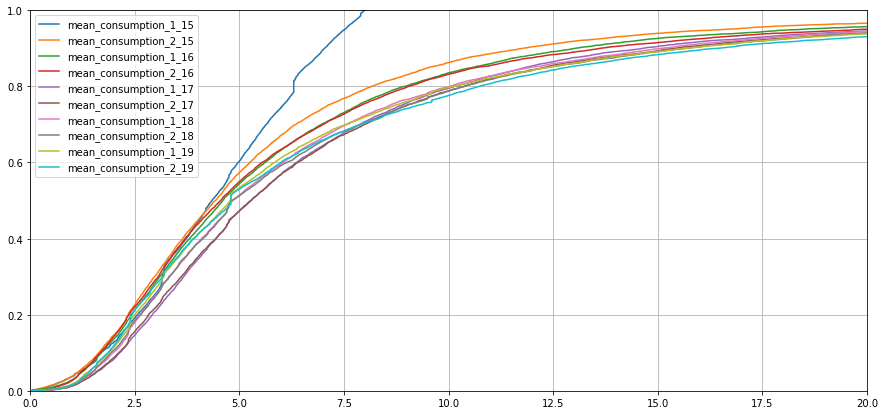

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
x = []
y = []
labels = [
          'mean_consumption_1_15','mean_consumption_2_15',
          'mean_consumption_1_16','mean_consumption_2_16',
          'mean_consumption_1_17','mean_consumption_2_17',
          'mean_consumption_1_18','mean_consumption_2_18',
          'mean_consumption_1_19','mean_consumption_2_19',
         ]
distinct_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#800000', '#000000', 
    '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
]
title_font = {'fontname':'DejaVu Sans', 'size':'13', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'DejaVu Sans', 'size':'12'}
for i in range(1, len(low_df.columns)):
    df0 = low_df.iloc[:,i]
    df0.dropna(inplace=True)
    T0=(df0.sort_values().value_counts())
    T0.sort_index(inplace=True)
    x0=T0.index
    y0=T0.cumsum()/len(df0)
    x.append(x0.tolist())
    y.append(y0.tolist())
# for i in range(0, 5):
#     ax[0].plot(x[i],y[i], label=labels[i], color=distinct_colors[i])
# for i in range(5, 10):
#     ax[1].plot(x[i],y[i], label=labels[i], color=distinct_colors[i])
# for i in range(0,2):   
#     ax[i].set_ylabel('Proportion of low consumption consumers', **axis_font)
#     ax[i].set_xlabel('smoothed mean consumption in kWh', **axis_font)
#     ax[i].set_title(f'Low consumption residential customers CDF with {len(low_df)} customers', **title_font)
#     ax[i].set_xlim([0, 25])
#     ax[i].grid(b=True, which='major')
#     ax[i].legend(fontsize=10)
    
for i in range(0, 10):
    ax.plot(x[i],y[i], label=labels[i])
    ax.set_xlim([0, 20])
    ax.set_ylim([0, 1])
    ax.legend(fontsize=10)
    ax.grid(b=True, which='major')
plt.show()

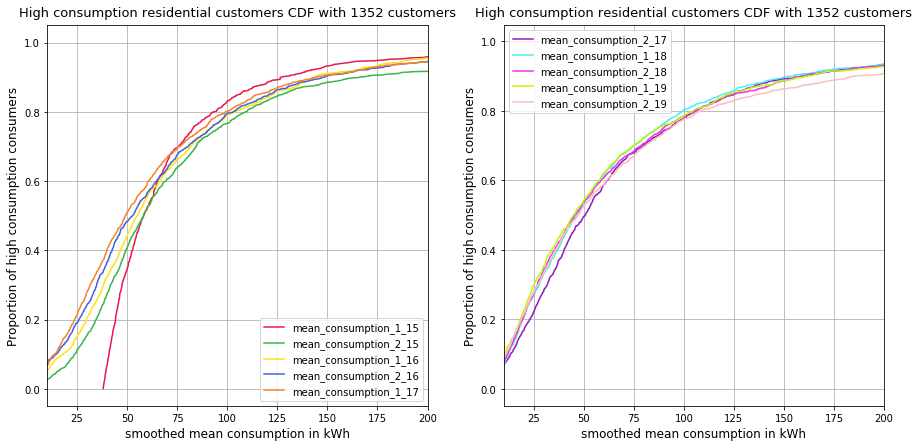

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
x = []
y = []
labels = [
          'mean_consumption_1_15','mean_consumption_2_15',
          'mean_consumption_1_16','mean_consumption_2_16',
          'mean_consumption_1_17','mean_consumption_2_17',
          'mean_consumption_1_18','mean_consumption_2_18',
          'mean_consumption_1_19','mean_consumption_2_19',
         ]
distinct_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#800000', '#000000', 
    '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
]
title_font = {'fontname':'DejaVu Sans', 'size':'13', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'DejaVu Sans', 'size':'12'}
for i in range(1, len(high_df.columns)):
    df0 = high_df.iloc[:,i]
#     df0.dropna(inplace=True)
    T0=(df0.sort_values().value_counts())
    T0.sort_index(inplace=True)
    x0=T0.index
    y0=T0.cumsum()/len(df0)
    x.append(x0.tolist())
    y.append(y0.tolist())
for i in range(0, 5):
    ax[0].plot(x[i],y[i], label=labels[i], color=distinct_colors[i])
for i in range(5, 10):
    ax[1].plot(x[i],y[i], label=labels[i], color=distinct_colors[i])
for i in range(0,2):   
    ax[i].set_ylabel('Proportion of high consumption consumers', **axis_font)
    ax[i].set_xlabel('smoothed mean consumption in kWh', **axis_font)
    ax[i].set_title(f'High consumption residential customers CDF with {len(high_df)} customers', **title_font)
    ax[i].set_xlim([10, 200])
    ax[i].grid(b=True, which='major')
    ax[i].legend(fontsize=10)
# for i in range(0, 10):
#     ax.plot(x[i],y[i], label=labels[i])
#     ax.set_xlim([10, 200])
#     ax.set_ylim([0, 1])
#     ax.legend(fontsize=10)
#     ax.grid(b=True, which='major')
plt.show()

In [3]:
consumption_datafile = '/mnt/nfs/work1/jtaneja/jmugyenyi/REG_consumption_data/smoothed_folder/merged_smoothed_monthly_by_meternumber_consumerid_march032021.pck'
df_full = pd.read_pickle(consumption_datafile)

In [17]:
meta_df[meta_df.meter_serial_number_consumer_id=="4226692038_20150922 145323.638 0002016 9815"]

,consumer_id,meter_serial_number,vending_category_name,district_id,district,installation_date,Matched_2_location,meter_serial_number_consumer_id,installation_year
375410,20150922 145323.638 0002016 9815,4226692038,[10. Residential],[78],[KIGALI],2015-09-22 14:54:47,YES,4226692038_20150922 145323.638 0002016 9815,2015


In [8]:
yearfilter = meta_df[meta_df.installation_year==2015]
yearfilter.head()

,consumer_id,meter_serial_number,vending_category_name,district_id,district,installation_date,Matched_2_location,meter_serial_number_consumer_id,installation_year
1682,101301,43800051609,[10. Residential],[78],[KIGALI],2015-04-09 11:24:36,YES,43800051609_101301,2015
3270,10256,14236106440,[10. Residential],[85],[KIGALI],2015-12-10 15:30:39,YES,14236106440_10256,2015
3345,102617,14103423399,[10. Residential],[25],[MUSANZE],2015-06-02 12:55:17,YES,14103423399_102617,2015
4025,103170,14103224250,[10. Residential],[11],[RUBAVU],2015-02-03 11:25:27,YES,14103224250_103170,2015
4699,1037,43800169047,[11. Non Residential],[12],[KIGALI],2015-01-23 08:04:58,YES,43800169047_1037,2015


In [10]:
df_2015 = df_full[df_full.meter_serial_number_consumer_id.isin(yearfilter.meter_serial_number_consumer_id)]

In [16]:
df_2015[(df_2015.meter_serial_number_consumer_id=='4226692038_20150922 145323.638 0002016 9815') & (df_2015.year==2018)]

,meter_serial_number_consumer_id,meter_serial_number,consumer_id,month,year,kWhs
5184,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,3,2018,14.200000
5189,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,5,2018,21.600000
5192,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,6,2018,1.900000
5194,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,7,2018,17.100000
5196,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,8,2018,30.900000
5198,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,9,2018,4.750000
5199,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,10,2018,10.792857
5201,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,11,2018,13.764286
5203,4226692038_20150922 145323.638 0002016 9815,4226692038,20150922 145323.638 0002016 9815,12,2018,13.728571
